## Deskew the Data

We will look at two common approaches to deskewing data:

- the log transform
- scaling by the Box-Cox test

For purposes of comparison, we will keep both transforms.

We have previously looked at scaling data as a preprocessing step. Note that scaling of data will have no effect on its skewness. 

Another way we can verify this is via a test of skewness.

To perform this test we can use the `scipy.stats.skewtest`.

This function tests the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution. Remember, a low p-value means reject the null hypothesis i.e the data is skewed!


In [1]:
import scipy.stats as st

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import display

customers = pd.read_csv('Wholesale_customers_data.csv')
customers.Region = customers.Region.astype('category')
customers.Channel = customers.Channel.astype('category')
customer_features = customers.select_dtypes([int])

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
customer_sc = scaler.fit_transform(customer_features)
customer_sc_df = pd.DataFrame(customer_sc, columns=customer_features.columns)

In [5]:
for col in customer_sc_df.columns:
    original_col_skewtest = st.skewtest(customer_features[col])
    scaled_col_skewtest = st.skewtest(customer_sc_df[col])
    print("{}\norig skew test: {} \nscaled skew test: {}\n\n".format(col, 
                                                                     original_col_skewtest,
                                                                     scaled_col_skewtest))

Fresh
orig skew test: SkewtestResult(statistic=13.363200236723891, pvalue=9.920555601203282e-41) 
scaled skew test: SkewtestResult(statistic=13.363200236723884, pvalue=9.9205556012042771e-41)


Milk
orig skew test: SkewtestResult(statistic=16.597463367777181, pvalue=7.2698939324027666e-62) 
scaled skew test: SkewtestResult(statistic=16.597463367777177, pvalue=7.2698939324029738e-62)


Grocery
orig skew test: SkewtestResult(statistic=15.727788993926845, pvalue=9.7558667104486924e-56) 
scaled skew test: SkewtestResult(statistic=15.727788993926845, pvalue=9.7558667104486924e-56)


Frozen
orig skew test: SkewtestResult(statistic=19.301887122446967, pvalue=5.1783108829290055e-83) 
scaled skew test: SkewtestResult(statistic=19.301887122446967, pvalue=5.1783108829290055e-83)


Detergents_Paper
orig skew test: SkewtestResult(statistic=15.815137437204189, pvalue=2.4467517316177991e-56) 
scaled skew test: SkewtestResult(statistic=15.815137437204193, pvalue=2.44675173161759e-56)


Delicatessen
or

### Deskew by taking the log of the data

Many times the skew of data can be easily removed by taking the log of the data. Let's do so here.

We will then scale the data after deskewing.

In [6]:
customer_log_df = np.log(1+customer_features)
scaler.fit(customer_log_df)
customer_log_sc = scaler.transform(customer_log_df)
customer_log_sc_df = pd.DataFrame(customer_log_sc, columns=customer_features.columns)

In [7]:
for col in customer_log_df.columns:
    original_col_skewtest = st.skewtest(customer_features[col])
    scaled_col_skewtest = st.skewtest(customer_sc_df[col])
    original_log_col_skewtest = st.skewtest(customer_log_df[col])
    scaled_log_col_skewtest = st.skewtest(customer_log_sc_df[col])
    print("""{}
    orig:       {} 
    scaled:     {}
    orig log:   {}
    scaled log: {}
    
    """.format(col, 
               original_col_skewtest,
               scaled_col_skewtest, 
               original_log_col_skewtest,
               scaled_log_col_skewtest))

Fresh
    orig:       SkewtestResult(statistic=13.363200236723891, pvalue=9.920555601203282e-41) 
    scaled:     SkewtestResult(statistic=13.363200236723884, pvalue=9.9205556012042771e-41)
    orig log:   SkewtestResult(statistic=-10.10280950731593, pvalue=5.3681802134267123e-24)
    scaled log: SkewtestResult(statistic=-10.10280950731593, pvalue=5.3681802134267123e-24)
    
    
Milk
    orig:       SkewtestResult(statistic=16.597463367777181, pvalue=7.2698939324027666e-62) 
    scaled:     SkewtestResult(statistic=16.597463367777177, pvalue=7.2698939324029738e-62)
    orig log:   SkewtestResult(statistic=-1.9212199962370617, pvalue=0.054703978253562636)
    scaled log: SkewtestResult(statistic=-1.9212199962370418, pvalue=0.054703978253565155)
    
    
Grocery
    orig:       SkewtestResult(statistic=15.727788993926845, pvalue=9.7558667104486924e-56) 
    scaled:     SkewtestResult(statistic=15.727788993926845, pvalue=9.7558667104486924e-56)
    orig log:   SkewtestResult(statistic=

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


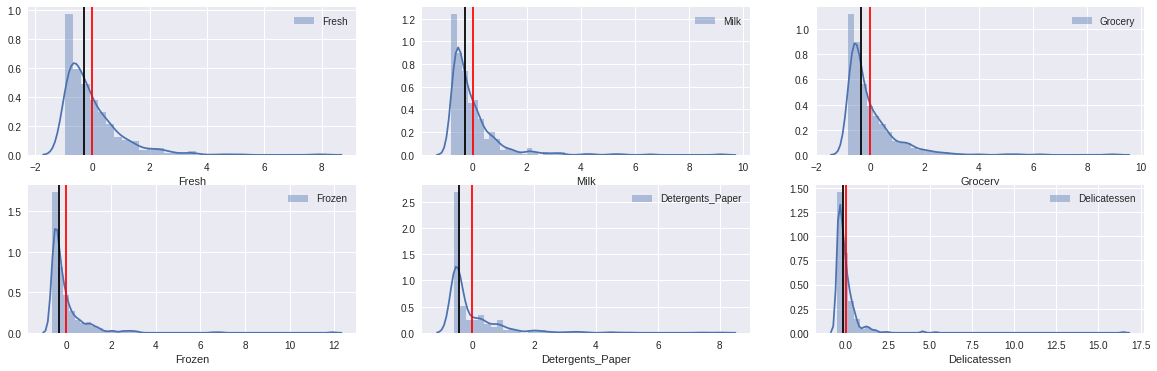

In [8]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_sc_df.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_sc_df[col], label=col)
    plt.axvline(customer_sc_df[col].mean(), c='red')
    plt.axvline(customer_sc_df[col].median(), c='black')
    plt.legend()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


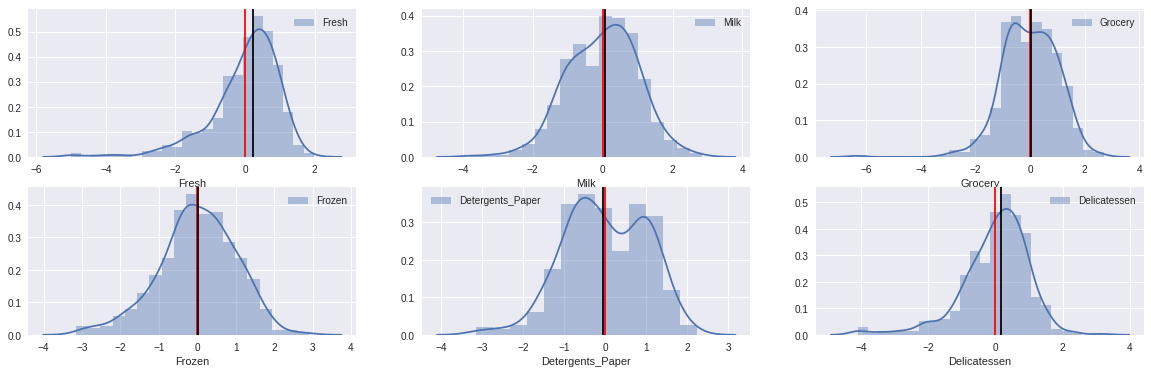

In [9]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_log_sc_df.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_log_sc_df[col], label=col)
    plt.axvline(customer_log_sc_df[col].mean(), c='red')
    plt.axvline(customer_log_sc_df[col].median(), c='black')
    plt.legend()

### Deskew by Box-Cox Test

The box cox test works by identifying the optimum power, $\lambda$ to raise the data where

$$\mathbf{x_i}' = \frac{\mathbf{x_i}^\lambda -1}{\lambda}$$

The implementation in Python is

```
y = (x**lmbda - 1) / lmbda, for lmbda > 0
    log(x),                 for lmbda = 0
```

`boxcox` requires the input data to be positive.

In [10]:
customer_box_cox_df = pd.DataFrame()
for col in customer_features.columns:
    box_cox_trans = st.boxcox(customer_features[col])[0]
    customer_box_cox_df[col] = pd.Series(box_cox_trans)

In [11]:
scaler.fit(customer_box_cox_df)
customer_box_cox_sc = scaler.transform(customer_box_cox_df)
customer_box_cox_sc_df = pd.DataFrame(customer_box_cox_sc, columns=customer_features.columns)

In [12]:
for col in customer_log_df.columns:
    original_col_skewtest = st.skewtest(customer_features[col])
    scaled_col_skewtest = st.skewtest(customer_sc_df[col])
    original_log_col_skewtest = st.skewtest(customer_log_df[col])
    scaled_log_col_skewtest = st.skewtest(customer_log_sc_df[col])
    original_box_cox_col_skewtest = st.skewtest(customer_box_cox_df[col])
    scaled_box_cox_col_skewtest = st.skewtest(customer_box_cox_sc_df[col])
    print("""{}
    orig:           {} 
    scaled:         {}
    orig log:       {}
    scaled log:     {}
    orig box-cox:   {}
    scaled box-cox: {}
    
    """.format(col, 
               original_col_skewtest,
               scaled_col_skewtest, 
               original_log_col_skewtest,
               scaled_log_col_skewtest, 
               original_box_cox_col_skewtest,
               scaled_box_cox_col_skewtest))

Fresh
    orig:           SkewtestResult(statistic=13.363200236723891, pvalue=9.920555601203282e-41) 
    scaled:         SkewtestResult(statistic=13.363200236723884, pvalue=9.9205556012042771e-41)
    orig log:       SkewtestResult(statistic=-10.10280950731593, pvalue=5.3681802134267123e-24)
    scaled log:     SkewtestResult(statistic=-10.10280950731593, pvalue=5.3681802134267123e-24)
    orig box-cox:   SkewtestResult(statistic=-0.35994737974045543, pvalue=0.71888648448291859)
    scaled box-cox: SkewtestResult(statistic=-0.35994737974044694, pvalue=0.71888648448292491)
    
    
Milk
    orig:           SkewtestResult(statistic=16.597463367777181, pvalue=7.2698939324027666e-62) 
    scaled:         SkewtestResult(statistic=16.597463367777177, pvalue=7.2698939324029738e-62)
    orig log:       SkewtestResult(statistic=-1.9212199962370617, pvalue=0.054703978253562636)
    scaled log:     SkewtestResult(statistic=-1.9212199962370418, pvalue=0.054703978253565155)
    orig box-cox:   Sk

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


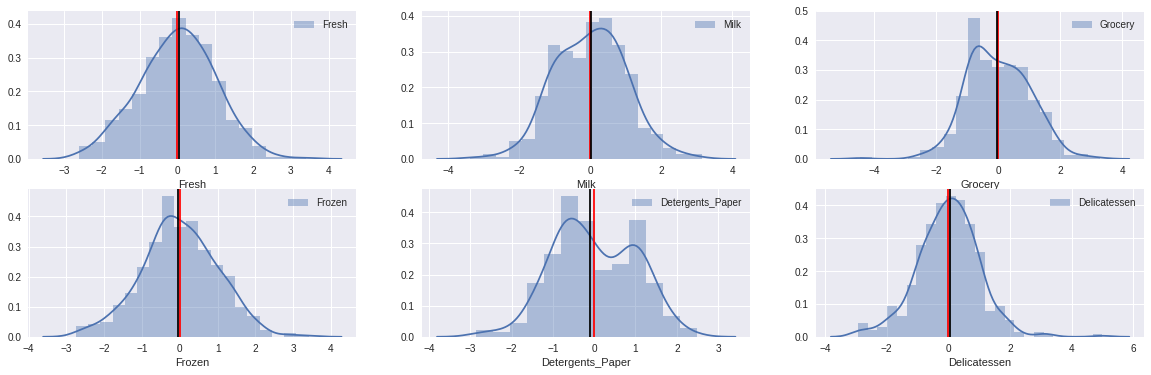

In [13]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_box_cox_sc_df.columns):
    fig.add_subplot(231+i)
    sns.distplot(customer_box_cox_sc_df[col], label=col)
    plt.axvline(customer_box_cox_sc_df[col].mean(), c='red')
    plt.axvline(customer_box_cox_sc_df[col].median(), c='black')
    plt.legend()